<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/my_gradient_Boosting_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import random

df = pd.DataFrame(
    [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
    ], columns = ['cgpa','iq','is_placed']
)

df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [129]:
# initial function (log loss)
from sklearn.metrics import log_loss
df['fx0']=np.log(5/3)

In [130]:
df

,cgpa,iq,is_placed,fx0
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [131]:
# convert log_loss to probability

df['fx0_probability'] = 1/(1+np.exp(-np.log(5/3)))

In [132]:
df

,cgpa,iq,is_placed,fx0,fx0_probability
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [133]:
# calculate the residual
df['residual_0'] = df['is_placed'] - df['fx0_probability']
df

,cgpa,iq,is_placed,fx0,fx0_probability,residual_0
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [134]:
# train the first decision tree
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor(max_leaf_nodes=3,random_state=1)
dt1.fit(df.iloc[:,0:2].values , df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

[Text(0.4, 0.8333333333333334, 'x[0] <= 6.375\nsquared_error = 0.234\nsamples = 8\nvalue = 0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 0.375'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 132.5\nsquared_error = 0.24\nsamples = 5\nvalue = -0.225'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -0.625'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.222\nsamples = 3\nvalue = 0.042')]

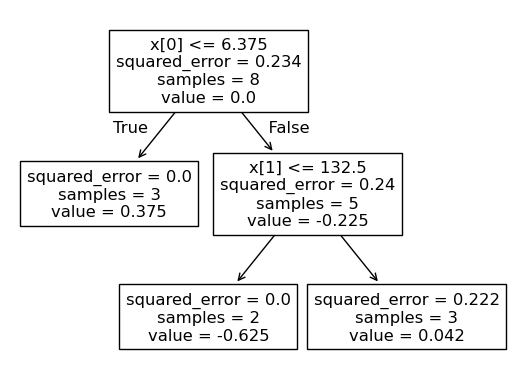

In [135]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [136]:
# add a column which tells in which leaf node the point lies of the given tree
df['leaf_no.'] = dt1.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,fx0,fx0_probability,residual_0,leaf_no.
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [137]:
# residue of the fx0 and the first decision tree is the sum of log loss of the fx0 and the first decision tree
# thus to get the log loss , go to every decision tree and get the value
def return_log_loss(leaf):
  temp_df = df[df['leaf_no.']==leaf]    # collects the points belonging to the same node
  numerator = temp_df['residual_0'].sum()   # calculates the sum of the residuals
  denominator = sum(temp_df['fx0_probability'] * (1 - temp_df['fx0_probability']))
  return round(numerator/denominator ,2)


In [138]:
df['log_loss_ensmble1'] = df['fx0'] + df['leaf_no.'].apply(return_log_loss)
df['log_loss_ensmble1']

# the sum of the log loss of the fx0 and the first decision tree

,log_loss_ensmble1
0,-2.159174
1,2.110826
2,2.110826
3,2.110826
4,0.690826
5,0.690826
6,0.690826
7,-2.159174


In [139]:
# convert the log_loss_ensmble1 into probability

df['ensemble1_probability'] = 1/(1+np.exp(-df['log_loss_ensmble1']))
df

,cgpa,iq,is_placed,fx0,fx0_probability,residual_0,leaf_no.,log_loss_ensmble1,ensemble1_probability
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477


In [140]:
# calculate the residual of the first ensemble

df['residual_1'] = df['is_placed'] - df['ensemble1_probability']
df

,cgpa,iq,is_placed,fx0,fx0_probability,residual_0,leaf_no.,log_loss_ensmble1,ensemble1_probability,residual_1
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477


# second iteration

In [141]:
# 2nd decision tree
dt2 = DecisionTreeRegressor(max_leaf_nodes=3,random_state=1)
dt2.fit(df.iloc[:,0:2],df.iloc[:,-1])

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

[Text(0.6, 0.8333333333333334, 'x[0] <= 6.995\nsquared_error = 0.09\nsamples = 8\nvalue = 0.015'),
 Text(0.4, 0.5, 'x[1] <= 136.5\nsquared_error = 0.09\nsamples = 5\nvalue = -0.089'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.008\nsamples = 4\nvalue = 0.055'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.666'),
 Text(0.8, 0.5, 'squared_error = 0.043\nsamples = 3\nvalue = 0.188'),
 Text(0.7, 0.6666666666666667, '  False')]

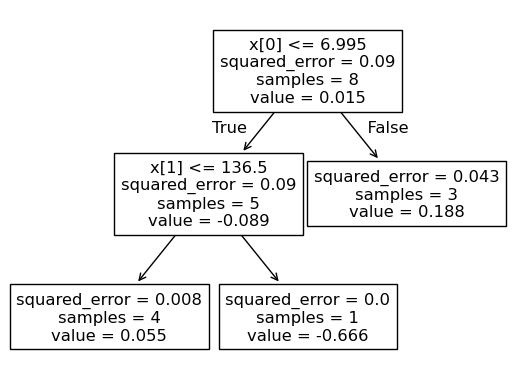

In [142]:
plot_tree(dt2)

In [143]:
# find the leaf no. in which points lie

df['leaf_no_2'] = dt2.apply(df.iloc[:,:2])
df['leaf_no_2']

,leaf_no_2
0,3
1,3
2,3
3,3
4,4
5,2
6,2
7,2


In [151]:
def return_logs(leaf):
  num = df[df['leaf_no_2'] == leaf]['residual_1'].sum()
  den = sum(df[df['leaf_no_2'] == leaf]['ensemble1_probability'] * (1 - df[df['leaf_no_2'] == leaf]['ensemble1_probability']))
  return round(num/den,2)

In [154]:
# log_loss of decision tree
df['log_loss_ensemble2'] = df['fx0'] +df['log_loss_ensmble1']+ df['leaf_no_2'].apply(return_logs)

In [155]:
# convert loss to probability
df['ensemble2_probability'] =  1/(1+np.exp(-df['log_loss_ensemble2']))

In [156]:
# calculate the residue

df['residual_2'] = df['is_placed'] - df['ensemble2_probability']

In [157]:
df

,cgpa,iq,is_placed,fx0,fx0_probability,residual_0,leaf_no.,log_loss_ensmble1,ensemble1_probability,residual_1,leaf_no_2,log_loss_ensemble2,ensemble2_probability,residual_2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717,-0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896,0.039104
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896,0.039104
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896,0.039104
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349,0.142052,-0.142052
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793,0.095207
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793,0.095207
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349,0.354722,-0.354722


In [160]:
# residuals for fx0 , ensemble 1 and ensemble 2 are :
df[['fx0','residual_1','residual_2']]

,fx0,residual_1,residual_2
0,0.510826,-0.103477,-0.255717
1,0.510826,0.108049,0.039104
2,0.510826,0.108049,0.039104
3,0.510826,0.108049,0.039104
4,0.510826,-0.666151,-0.142052
5,0.510826,0.333849,0.095207
6,0.510826,0.333849,0.095207
7,0.510826,-0.103477,-0.354722


In [ ]:
# continue this process for the n no. of decision trees